# Foundations of AI & ML
## Session 05
### CaseStudy
### Lab

**Objectives:** Create a linear regression based product rating solution.


In [3]:
import pandas as pd
data = pd.read_csv("Datasets/amazon.csv")
print(data.describe())
data = data.dropna()
print(data.describe())

       Unnamed: 0    ratings
count   99.000000  99.000000
mean    49.000000   4.383838
std     28.722813   0.791628
min      0.000000   2.000000
25%     24.500000   4.000000
50%     49.000000   5.000000
75%     73.500000   5.000000
max     98.000000   5.000000
       Unnamed: 0    ratings
count   99.000000  99.000000
mean    49.000000   4.383838
std     28.722813   0.791628
min      0.000000   2.000000
25%     24.500000   4.000000
50%     49.000000   5.000000
75%     73.500000   5.000000
max     98.000000   5.000000


In [4]:
data.head()

,Unnamed: 0,reviews,ratings
0,0,I like the item pricing. My granddaughter want...,5
1,1,Love the magnet easel... great for moving to d...,4
2,2,Both sides are magnetic. A real plus when you...,5
3,3,Bought one a few years ago for my daughter and...,5
4,4,I have a stainless steel refrigerator therefor...,4


In [5]:
data.tail()

,Unnamed: 0,reviews,ratings
94,94,This is a sturdy and easy to put together puzz...,4
95,95,"This puzzle is very attractive for kids, at le...",4
96,96,My little girl (almost 3) is really into anima...,4
97,97,Mudpuppy at the Zoo is a brightly colored attr...,4
98,98,Jumbo puzzles are the way to go for young ones...,5


In [6]:
ratings = data['ratings'].values
reviews = data['reviews'].values
lengths = [len(r) for r in reviews]

#### We first preprocess the data by removing all the incorrect rows (that have missing rating or reviews), unwanted columns, removing stopwords and soon.

In [7]:
import re
only_alnum = re.compile(r"[^a-z0-9]+")
## Replaces one or more occurrence of any characters other than a-z and 0-9 with a space
## This automatically replaces multiple spaces by 1 space

## The try ... except ensures that if a review is mal-formed then the review is replaced with the word ERROR
def cleanUp(s):
    return re.sub(only_alnum, " ", s.lower())

In [8]:
## We make a set for testing if a word is not useful
## sets are way faster than lists for this purpose
fluff = set([w.strip() for w in open("Datasets/fluff.txt")])

In [9]:
## Replace words like coooooool with cool, amaaaaaazing with amaazing and so on
def dedup(s):
    return re.sub(r'([a-z])\1+', r'\1\1', s)
print(dedup("cooooool"))
print(dedup("amaaaaaazzzzing"))
print(dedup('cool'))

cool
amaazzing
cool


In [10]:
def get_useful_words(s):
    return [dedup(w) for w in cleanUp(s).split() if len(w) > 2 and w not in fluff]

In [11]:
clean_reviews = [get_useful_words(review) for review in reviews]
for i in range(5):
    print("%4d" %(len(reviews[i])), reviews[i], "\n==>", clean_reviews[i])

 100 I like the item pricing. My granddaughter wanted to mark on it but I wanted it just for the letters. 
==> ['like', 'item', 'pricing', 'granddaughter', 'mark', 'letters']
 121 Love the magnet easel... great for moving to different areas... Wish it had some sort of non skid pad on bottom though... 
==> ['love', 'magnet', 'easel', 'great', 'moving', 'wish', 'sort', 'skid', 'pad', 'bottom']
 420 Both sides are magnetic.  A real plus when you're entertaining more than one child.  The four-year old can find the letters for the words, while the two-year old can find the pictures the words spell.  (I bought letters and magnetic pictures to go with this board).  Both grandkids liked it a lot, which means I like it a lot as well.  Have not even introduced markers, as this will be used strictly as a magnetic board. 
==> ['magnetic', 'real', 'plus', 'entertaining', 'more', 'child', 'letters', 'words', 'pictures', 'words', 'spell', 'bought', 'letters', 'magnetic', 'pictures', 'board', 'grandki

In [12]:
final_reviews = list(zip(clean_reviews, ratings, lengths))
#We look at a Random sample of 10 cleaned data.
import random
for i in range(10):
    r = random.randrange(0, len(final_reviews))
    print(final_reviews[r])

(['kids', 'love', 'books', 'carry', 'entertained', 'hours', 'sit', 'move', 'stickers', 'add', 'more', 'stickers', 'happy', 'clam', 'books', 'amazing', 'quality', 'stickers', 'pulled', 'moved', 'stacked', 'damage', 'stickers', 'stickers', 'website', 'best', 'buy', 'like', 'kids', 'love', 'foods', 'stack', 'hamburgers', 'etc', 'stickers', 'best', 'incentive', 'kids', 'love', 'earn', 'trade', 'stickers', 'books', 'great', 'birthday', 'gift', 'party', 'favor', 'holiday'], 5, 665)
(['kids', 'love', 'books', 'carry', 'entertained', 'hours', 'sit', 'move', 'stickers', 'add', 'more', 'stickers', 'happy', 'clam', 'books', 'amazing', 'quality', 'stickers', 'pulled', 'moved', 'stacked', 'damage', 'stickers', 'stickers', 'website', 'best', 'buy', 'like', 'kids', 'love', 'foods', 'stack', 'hamburgers', 'etc', 'stickers', 'best', 'incentive', 'kids', 'love', 'earn', 'trade', 'stickers', 'books', 'great', 'birthday', 'gift', 'party', 'favor', 'holiday'], 5, 665)
(['love', 'larger', 'size', 'pieces', 

** Case-Study:** Use the list of substantive words extracted from the Review as well as the length of the original Review. Decide how you would like to Derive a feature set to predict the Rating, which is a float (1.0 to 5.0).

Remember to split the Data into training, testing and Validation sets.
1. Select 10% of the Data for testing and put it away.
2. Select 20% of the Data for Validation and 70% for Training.
3. Vary the above ratio between Validation and Testing: 30 - 60, 45 - 45, 60 - 30 and Verify the effect if any on the prediction accuracy.


Some Possibilities:

1. You can use a single feature namely, the difference between number of Positive & Negative words. 

2. You can also considering predicting the rating based on the above difference and add the length of the Review as two independent Variables.

3. You could consider the Positive Words and Negative Words as two independent Variables rather than treating their difference as single independent Variable, giving you more possibilities.


In [13]:
# Split training, validation and test data ( 70, 20 ,10)
def split_data(final_reviews, train, val, test):
    total_len = len(final_reviews)
    train_coll = [i for i in final_reviews[:int(train * total_len)]]
    val_coll = [i for i in final_reviews[int(train * total_len): int((train+val) * total_len)]]
    test_coll = [i for i in final_reviews[int((train+val) * total_len):] ]
    
    return(train_coll, val_coll, test_coll)

(train_coll, val_coll, test_coll) = split_data(final_reviews, 0.7, 0.2, 0.1)

In [14]:
positive_words = pd.read_csv("Datasets/positive-words.txt")
negative_words = pd.read_csv("Datasets/negative-words.txt")

Typically, data of amazon ratings file consists of three columns called set,labels and length part. here we are splitting the three columns and making three different lists as set, labels and len_Set respectively.

In [15]:
#for training data
train_set = [i[0] for i in train_coll]
val_set =   [i[0] for i in val_coll]
test_set =  [i[0] for i in test_coll]

#for validation data
train_labels = [i[1] for i in train_coll]
val_labels = [i[1] for i in val_coll]
test_labels = [i[1] for i in test_coll]

#for testing data
train_len_set = [i[2] for i in train_coll]
val_len_set = [i[2] for i in val_coll]
test_len_set = [i[2] for i in test_coll]

In [16]:
train_features=[] #features list for training data
val_features=[] #features list for validation data
test_features=[] #features list for testing data
pos_train=[] #postive words count list for training data
neg_train=[] #negative words count list for training data
pos_val=[] #positve words count list for validation data
neg_val=[] #negative words count list for validation data
pos_test=[] #positve words count list for testing data
neg_test=[] #negative words count list for testing data

for i in range(len(train_set)):
    pos=0
    neg=0
    for j in range(len(train_set[i])):
        if train_set[i][j] in positive_words.values:
            pos+=1
        elif train_set[i][j] in negative_words.values:
            neg+=1
    pos_train.append(pos)
    neg_train.append(pos)
    train_features.append(abs(pos-neg))
for i in range(len(val_set)):
    pos=0
    neg=0
    for j in range(len(val_set[i])):
        if val_set[i][j] in positive_words.values:
            pos+=1
        elif val_set[i][j] in negative_words.values:
            neg+=1
    pos_val.append(pos)
    neg_val.append(neg)
    val_features.append(abs(pos-neg))
for i in range(len(test_set)):
    pos=0
    neg=0
    for j in range(len(test_set[i])):
        if test_set[i][j] in positive_words.values:
            pos+=1
        elif test_set[i][j] in negative_words.values:
            neg+=1
    pos_test.append(pos)
    neg_val.append(neg)
    test_features.append(abs(pos-neg))

In [17]:
import scipy.stats as ss

In [18]:
m, c, _, _, _ = ss.linregress(train_features, train_labels)

In [19]:
print(m)
print(c)
print("m = {0:.6} c = {1:.6} ".format(m, c))

0.0675844806007509
4.191489361702128
m = 0.0675845 c = 4.19149 


In [20]:
print(len(train_features), len(train_labels), len(test_len_set))
yt = [ m * i + c  for i in test_features]

69 69 10


In [21]:
import matplotlib.pyplot as plt

m = 0.0675845 c = 4.19149 


c:\users\karthik\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


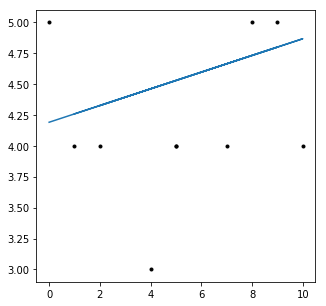

In [24]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

print("m = {0:.6} c = {1:.6} ".format(m, c))
yt = [ m * i + c  for i in test_features]

ax.clear()
ax.plot(test_features, test_labels, '.k')
ax.plot(test_features, yt)
fig.canvas.draw()

In [25]:
# positive -neagtive count + total number of words
train_features_2 = [] #features list for training data
val_features_2 =[] #features list for validation data
test_features_2 =[] #features list for testing data
for i in range(len(train_set)):
    train_features_2.append((train_features[i], train_len_set[i]))
for i in range(len(val_set)):
    val_features_2.append((val_features[i], val_len_set[i]))
for i in range(len(test_set)):
    test_features_2.append((test_features[i], test_len_set[i]))

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train_features_2, train_labels)

pred_train = lm.predict(train_features_2)
pred_test = lm.predict(test_features_2)

In [28]:
import numpy as np

In [29]:
print ('Fit a model train_features_2, and calculate MSE with train_labels:',  np.mean((train_labels - pred_train) ** 2))
print ('Fit a model train_features_2, and calculate MSE with test_features_1, test_labels:', np.mean((test_labels - pred_test) ** 2))

Fit a model train_features_2, and calculate MSE with train_labels: 0.7199760241878481
Fit a model train_features_2, and calculate MSE with test_features_1, test_labels: 0.4987791806588683


Text(0,0.5,'Residuals')

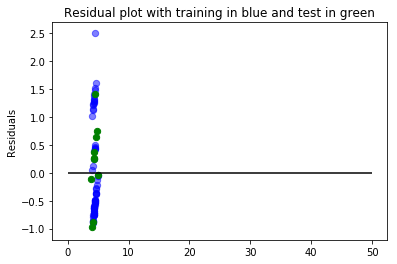

In [30]:
plt.scatter(pred_train, pred_train-train_labels, c='b',s=40,alpha=0.5)
plt.scatter(pred_test, pred_test-test_labels, c='g',s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual plot with training in blue and test in green')
plt.ylabel('Residuals')

In [31]:
## Positive, negative words and total words
train_features_3=[] #features list for training data
val_features_3 = [] #features list for validation data
test_features_3 = [] #features list for testing data
for i in range(len(train_set)):
    train_features_3.append((pos_train[i], neg_train[i], train_len_set[i]))
for i in range(len(val_set)):
    val_features_3.append((pos_val[i], neg_val[i], val_len_set[i]))
for i in range(len(test_set)):
    test_features_3.append((pos_val[i], neg_val[i], test_len_set[i]))




In [32]:
lm1 = LinearRegression()
lm1.fit(train_features_3, train_labels)

pred_train_1 = lm1.predict(train_features_3)
pred_test_1 = lm1.predict(test_features_3)

In [33]:
print ('Fit a model train_features_3, and calculate MSE with train_labels:',  np.mean((train_labels - pred_train_1) ** 2))
print ('Fit a model train_features_3, and calculate MSE with test_features_3, test_labels:', np.mean((test_labels - pred_test_1) ** 2))

Fit a model train_features_3, and calculate MSE with train_labels: 0.7124447966701049
Fit a model train_features_3, and calculate MSE with test_features_3, test_labels: 0.5078666930847465


Text(0,0.5,'Residuals')

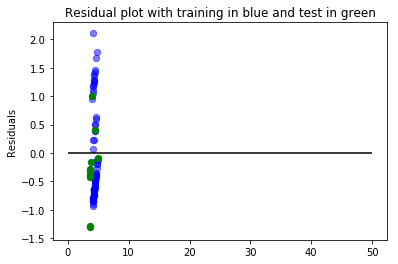

In [34]:
plt.scatter(pred_train_1, pred_train_1-train_labels, c='b',s=40,alpha=0.5)
plt.scatter(pred_test_1, pred_test_1-test_labels, c='g',s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual plot with training in blue and test in green')
plt.ylabel('Residuals')